In [249]:
from pandas import read_csv
my_dataset = read_csv("/workspaces/Main-DSDT-Example-Repo/Machine Learning Fundamentals/kc_house_cleaned (2).csv")

In [250]:
display(my_dataset.head())

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,roof_type_Asphalt,roof_type_Clay,roof_type_Metal,waterfront
0,0,221900.0,3,1.0,1180,5650,1.0,0,3,7,...,0,98178,47.5112,-122.257,1340,5650,True,False,False,False
1,2,180000.0,2,1.0,770,10000,1.0,0,3,6,...,0,98028,47.7379,-122.233,2720,8062,False,False,True,False
2,3,604000.0,4,3.0,1960,5000,1.0,0,5,7,...,0,98136,47.5208,-122.393,1360,5000,True,False,False,False
3,4,510000.0,3,2.0,1680,8080,1.0,0,3,8,...,0,98074,47.6168,-122.045,1800,7503,True,False,False,False
4,5,510000.0,3,2.0,1680,8080,1.0,0,3,8,...,0,98074,47.6168,-122.045,1800,7503,True,False,False,False


In [251]:
target_column_name = 'waterfront'

training_labels = my_dataset[target_column_name]

training_features = my_dataset.drop(columns=[target_column_name, 'Unnamed: 0'])

In [252]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(training_features, training_labels)


In [253]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

my_model = LogisticRegression()

my_tree = DecisionTreeClassifier(min_samples_split=20)


In [254]:
my_model.fit(X_train, y_train)

my_tree.fit(X_train, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,20
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [255]:
predictions = my_model.predict_proba(X_test)  

tree_predictions = my_tree.predict_proba(X_test)

In [256]:
predictions

array([[0.99694183, 0.00305817],
       [0.99840211, 0.00159789],
       [0.99844876, 0.00155124],
       ...,
       [0.99253488, 0.00746512],
       [0.9968631 , 0.0031369 ],
       [0.99534751, 0.00465249]], shape=(4689, 2))

In [257]:
single_label_format_predcitions = predictions[:, 1]

tree_single_label_format_predictions = tree_predictions[:, 1]

In [258]:
single_label_format_predcitions

array([0.00305817, 0.00159789, 0.00155124, ..., 0.00746512, 0.0031369 ,
       0.00465249], shape=(4689,))

In [259]:
from sklearn.metrics import roc_curve


(fpr, tpr, thresholds) = roc_curve(y_test, single_label_format_predcitions)


(tree_fpr, tree_tpr, thresholds) = roc_curve(y_test, tree_single_label_format_predictions)

In [260]:
import matplotlib.pyplot as plt

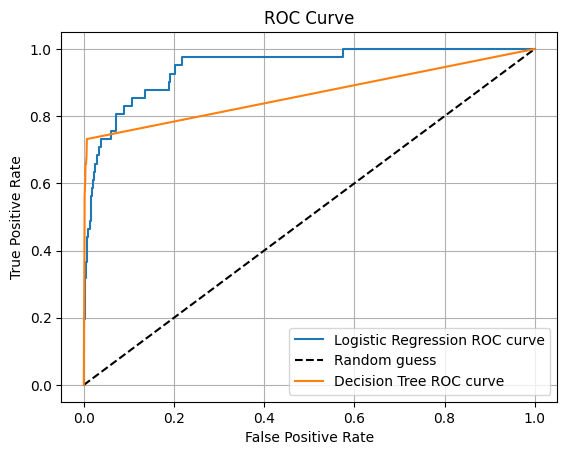

In [261]:
# ROC curve
# plt.figure(figsize=(10, 10))

# Create a figure and a single Axes object
fig, ax = plt.subplots()


ax.plot(fpr, tpr, label='Logistic Regression ROC curve')
ax.plot([0, 1], [0, 1], 'k--', label='Random guess')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
ax.grid()

# ROC curve
ax.plot(tree_fpr, tree_tpr, label='Decision Tree ROC curve')
ax.legend()